## I- Import necessary Labraries

In [3]:
# Data wrangling
import numpy as np      # vectors and matrices || Linear Algebra
import pandas as pd     # tables and data manipulations

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To have graphs embedded in the notebook
%matplotlib inline

# Models Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler



## II- Load Data

In [13]:
df = pd.read_csv("C:/Users/khaoula/Downloads/BankCustomers.csv")

## III- Data Exploration

In [14]:
print('------------ Dataset Shape -------------')
print('\n This dataset has "{0}" rows and "{1}" columns'.format(df.shape[0],df.shape[1]))
print('\n The Columns in this Dataset are')
list(df.columns.values)

------------ Dataset Shape -------------

 This dataset has "10000" rows and "14" columns

 The Columns in this Dataset are


['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [15]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


###  1) Missing Values

In [16]:
df_info=pd.DataFrame(df.dtypes).T.rename(index={0:'Type'})
df_info=df_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'nb null values'}))
df_info=df_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'% null values'}))
display(df_info)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Type,int64,int64,object,int64,object,object,int64,int64,float64,int64,int64,int64,float64,int64
nb null values,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% null values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* According to this table, there is no missing values :)

### 2) Deplicate Observations

In [17]:
print('Duplicated observations: {}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)

Duplicated observations: 0


### 3) Remove unecessary columns

In [18]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df.shape

(10000, 11)

In [19]:
X = df.columns.tolist()[:10]
y = df.columns.tolist()[-1:]
print(f'All columns: {df.columns.tolist()}')
print()
print(f'X values: {X}')
print()
print(f'y values: {y}')

All columns: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

y values: ['Exited']


### 4) Check Variables

#### 4.1- Describe the numerical variables of the dataset

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


#### 4.2- Describe the categorical variables of the dataset

In [21]:
df.describe(include=[object]).T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


#### 4.3- Encode categoraical data

In [22]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
df = pd.get_dummies(df,columns = ['Geography','Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0



## IV. Data Visualisation

### 0) The distribution of culomns

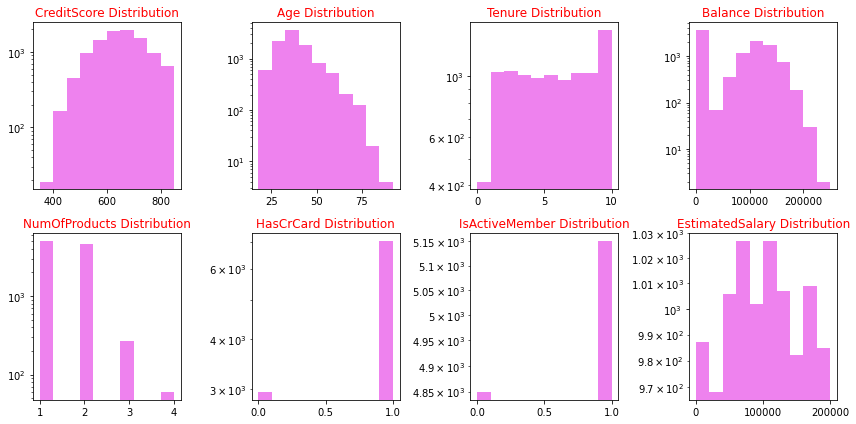

In [24]:
fig, axes = plt.subplots(2,4,figsize=(12,6))
columns = df.columns
for i, ax in enumerate(axes.flatten()):
    ax.hist(df[columns[i]], bins=10, color='violet')
    ax.set_title(str(columns[i])+' Distribution', color='red')
    ax.set_yscale('log')
plt.tight_layout()

### 1) Visualize the target column

In [25]:
Statistics = df['Exited'].value_counts()
print(Statistics)

0    7963
1    2037
Name: Exited, dtype: int64


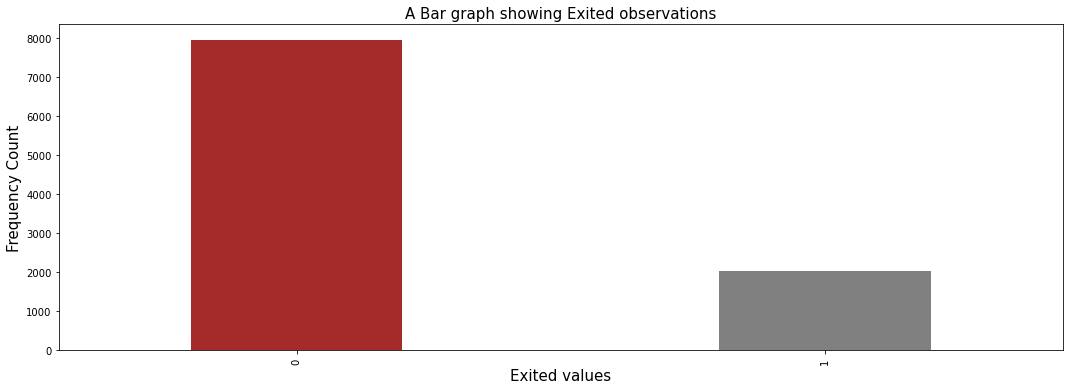

In [26]:
ax = Statistics.plot(kind='bar',figsize=(18,6), width=0.40 ,color=['brown','gray'])
ax.set_xlabel("Exited values",fontsize=15)      
ax.set_ylabel("Frequency Count",fontsize=15)
ax.set_title( 'A Bar graph showing Exited observations' ,fontsize = 15)
plt.show()

### 2) Check the correlation

<AxesSubplot:>

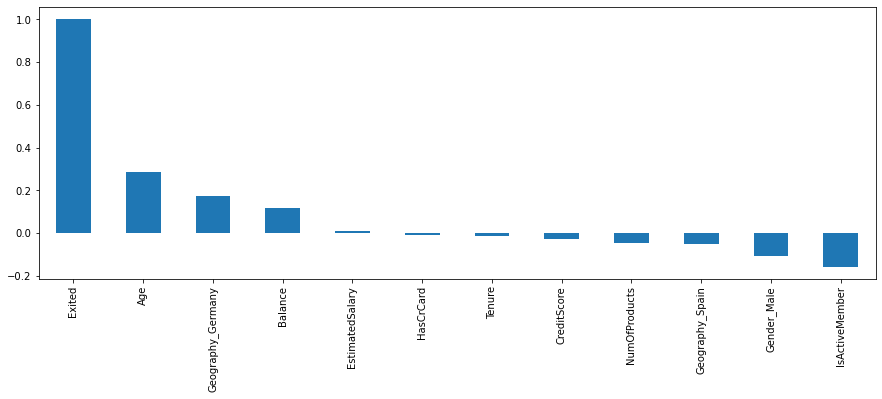

In [27]:
plt.figure(figsize=(15,5))
df.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

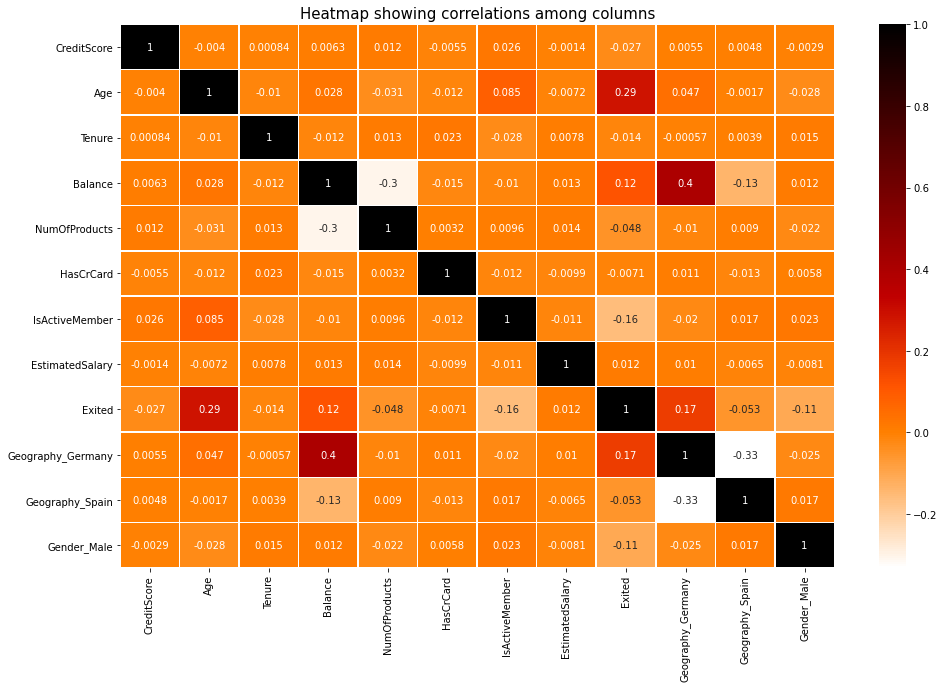

In [28]:
plt.figure(figsize=(16,10))  
sns.heatmap(df.corr(),annot=True,linewidths=.5, cmap="gist_heat_r")
plt.title('Heatmap showing correlations among columns',fontsize = 15)
plt.show()


* According to the graphs above, these attributes are the most correlated to our target
    * Age,
    * Geography_Germany,
    * Balance
    * Gender_Female
    * Estimatedsalary

### 3) Data distributed plots

In [29]:
num_0 = df[df.Exited == 0].shape[0]
num_1 = df[df.Exited == 1].shape[0]

print( num_0 / (num_0 + num_1) * 100 , "% of customers stayed in the bank.")
print( num_1 / (num_0 + num_1) * 100 , "% of customers left the bank.")

79.63 % of customers stayed in the bank.
20.369999999999997 % of customers left the bank.


Text(0, 0.5, 'count')

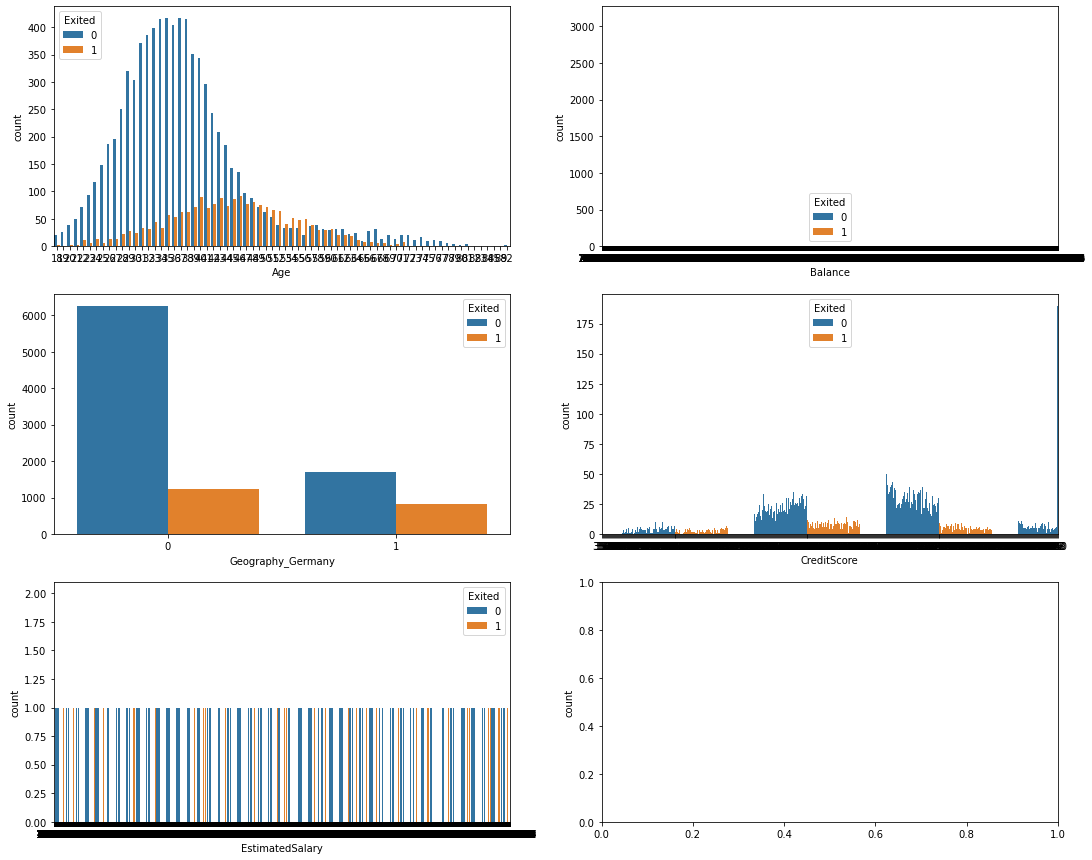

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(18, 15))
sns.countplot(x= df.Age, hue = 'Exited' ,data=df, ax =axs[0][0])
sns.countplot(x= df.Balance, hue = 'Exited' ,data=df, ax =axs[0][1])
sns.countplot(x=df.Geography_Germany, hue = 'Exited' ,data=df, ax=axs[1][0])
sns.countplot(x=df.CreditScore, hue = 'Exited' ,data=df, ax=axs[1][1])
sns.countplot(x=df.EstimatedSalary, hue = 'Exited' ,data=df, ax=axs[2][0])
plt.ylabel('count')

* The impact of the rest of data

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

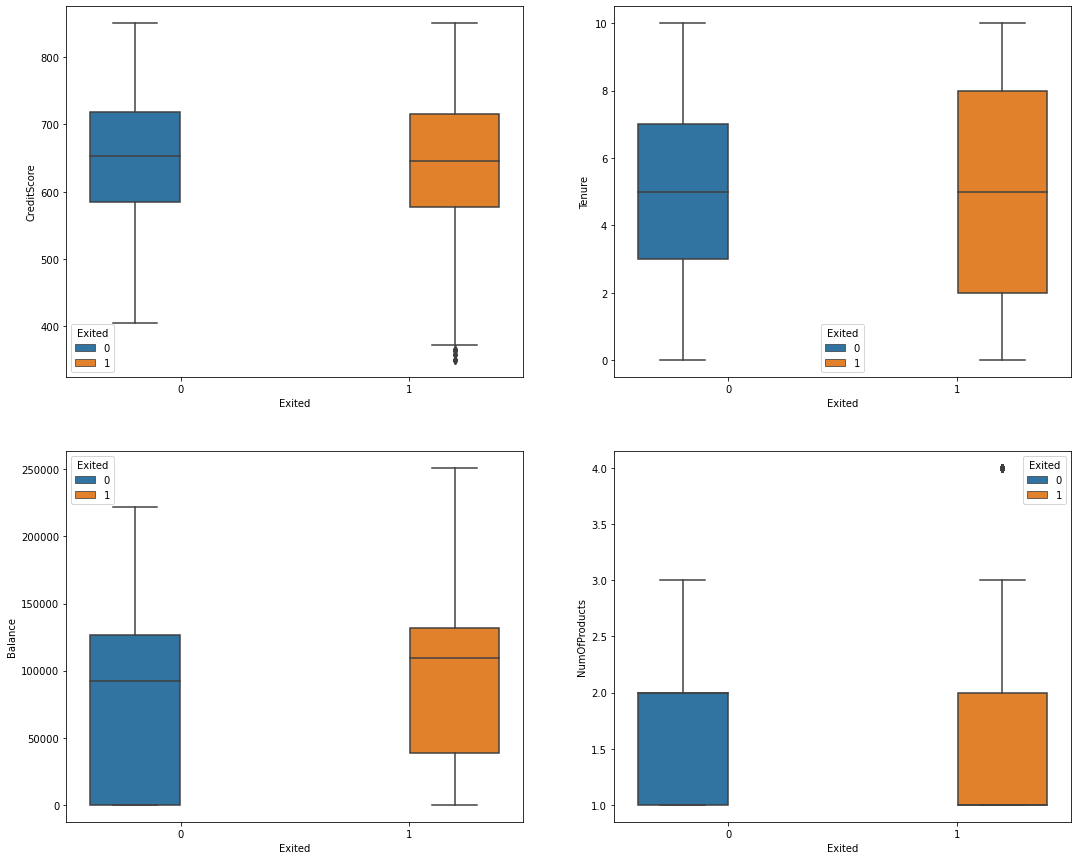

In [31]:
fig, axarr = plt.subplots(2, 2, figsize=(18, 15))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][1])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])

## V. Data Preparation

In [51]:
pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [33]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [36]:
scaler = MinMaxScaler() 

bumpy_features = ["CreditScore", "Age", "Balance",'EstimatedSalary']

df_scaled = pd.DataFrame(data = X)
df_scaled[bumpy_features] = scaler.fit_transform(X[bumpy_features])

In [37]:
df_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,2,0.000000,1,1,1,0.506735,0,0,0
1,0.516,0.310811,1,0.334031,1,0,1,0.562709,0,1,0
2,0.304,0.324324,8,0.636357,3,1,0,0.569654,0,0,0
3,0.698,0.283784,1,0.000000,2,0,0,0.469120,0,0,0
4,1.000,0.337838,2,0.500246,1,1,1,0.395400,0,1,0


In [53]:

X = df_scaled
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=7)




## Logistic Regression

In [55]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Accuracy: 0.7156308851224106
Precision: 0.7206809583858764
Recall: 0.711706102117061


In [56]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV

grid = {"C":np.logspace(-3, 3, 20),
                "penalty": ["l2"], 
                "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 
logreg = LogisticRegression()
logreg_CV = GridSearchCV(logreg, grid, cv=5)
logreg_CV.fit(X_train, y_train)

print("tuned hyperparameters: (best_parameters)", logreg_CV.best_params_)
print("accuracy", logreg_CV.best_score_)


tuned hyperparameters: (best_parameters) {'C': 54.555947811685144, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy 0.720486656200942


              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1580
           1       0.72      0.72      0.72      1606

    accuracy                           0.72      3186
   macro avg       0.72      0.72      0.72      3186
weighted avg       0.72      0.72      0.72      3186

[[1137  443]
 [ 457 1149]]


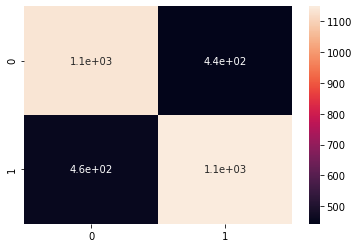

In [57]:
#Best model
from sklearn.metrics import classification_report, confusion_matrix

best_logreg = LogisticRegression(C=12.74, penalty="l2", solver="sag")
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)

cmG = confusion_matrix(y_test, y_pred)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [58]:
grid_predictions = best_logreg.predict(X_test) 

test_accuracy=accuracy_score(y_test,grid_predictions)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 71.75%


## 2. K — Nearest Neighbor Classifier
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with X_train, y_train and using one nearest neighbor (n_neighbors = 1)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1580
           1       0.81      0.93      0.87      1606

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.85      3186
weighted avg       0.86      0.86      0.85      3186

[[1240  340]
 [ 120 1486]]


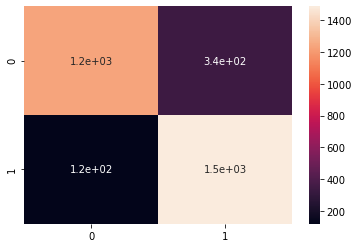

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

cmG = confusion_matrix(y_test,knn_predict)
sns.heatmap(cmG,annot=True)
print(classification_report(y_test,knn_predict))
print(confusion_matrix(y_test,knn_predict))

In [60]:
from sklearn.model_selection import GridSearchCV
#from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_params={'n_neighbors':range(1,30)}
knn_classifier=GridSearchCV(knn,knn_params,cv=10)
knn_classifier.fit(X_train,y_train)
knn_classifier.best_params_,knn_classifier.best_score_

({'n_neighbors': 1}, 0.8517268445839875)

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1580
           1       0.81      0.93      0.87      1606

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.85      3186
weighted avg       0.86      0.86      0.85      3186

[[1240  340]
 [ 120 1486]]


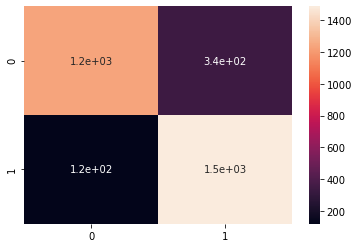

In [61]:
#Best model
best_logreg = KNeighborsClassifier(n_neighbors=1)
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)

cmG = confusion_matrix(y_test, y_pred)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [62]:
test_accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 85.56%


## 3. Support Vector Classifier

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1580
           1       0.77      0.79      0.78      1606

    accuracy                           0.77      3186
   macro avg       0.77      0.77      0.77      3186
weighted avg       0.77      0.77      0.77      3186

[[1191  389]
 [ 337 1269]]


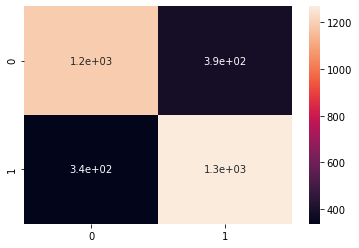

In [63]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
y_predict = svc_model.predict(X_test)

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True)
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid= {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid=GridSearchCV(SVC(),param_grid,cv=10)
grid.fit(X_train,y_train)
grid.best_params_

best_svc = SVC(C= 100, gamma = 1, kernel='rbf')
best_svc.fit(X_train,y_train)
y_pred=best_svc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

# 4. Decision Trees 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

model = DecisionTreeClassifier() 
model.fit(X_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuaracy :", model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

In [ ]:
# k fold cross validatio

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
print(cvs)

In [ ]:
print("Mean Accuracy :", cvs.mean())
print("Variance :", cvs.std())

# 6. Multi Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (100, 100), activation ='relu', 
                      solver = 'adam', max_iter = 50)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cm = confusion_matrix(y_test, y_pred)
print(cm)

# 7. Aritificial Neural Networks

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 14))

# second hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

# third hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

# fourth hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

# fifth hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, nb_epoch = 50)

In [ ]:
# creating the model
model = Sequential()

from keras.layers import Dropout

# first hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 14))
model.add(Dropout(0.5))

# second hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, nb_epoch = 50)



In [ ]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 14))
model.add(Dropout(0.1))

# second hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))
model.add(Dropout(0.1))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, nb_epoch = 50)



In [ ]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 13))

# second hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, nb_epoch = 49)


In [ ]:
data.columns

In [ ]:
'''
predicting if the costumer having following information will leave the bank or not ?

Geography : france
Age = 50
Credit score = 850
Tenure = 4
Balance = 150000
Number of Products = 5
Gender = Female
Has Credit Card = yes
Is Active Member = yes
Estimated Salary = 85000
'''

new_prediction = model.predict(sc.transform(np.array([[850, 50, 4, 150000, 5, 1, 1, 85000, 1, 0, 0, 1, 0]])))

new_prediction = (new_prediction > 0.5 )
print(new_prediction)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from keras.layers import Dense
from keras.models import Sequential

def build_classifier():
  # creating the model
  model = Sequential()

  # first hidden layer
  model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 13))

  # second hidden layer
  model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

  # output layer
  model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

  # Compiling the NN
  # binary_crossentropy loss function used when a binary output is expected
  model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
  
  return model

model = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 50)
accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10, n_jobs = -1)


In [ ]:
print("Accuracies :", accuracies)

print("Mean Accuracy :", accuracies.mean())
print("Variance :", accuracies.std())